In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import math
import time

In [3]:
def f(x1,x2):
    y=0.5*(x1**4-16*x1**2+5*x1+x2**4-16*x2*x2+5*x2)
    return y
def f1(x1,x2):
    ans=[2*x1**3-16*x1+2.5,2*x2**3-16*x2+2.5]
    return ans
def hesse(x1,x2):
    ans=[[6*x1*x1-16,0],[0,6*x2*x2-16]]
    return ans

函数图像绘制

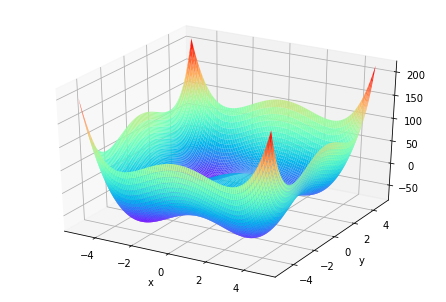

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
Z=f(X,Y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

1. 梯度下降（一维精确搜索）

total cost: 1.1951999999837426


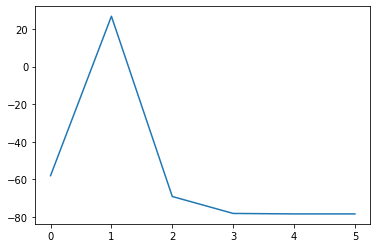

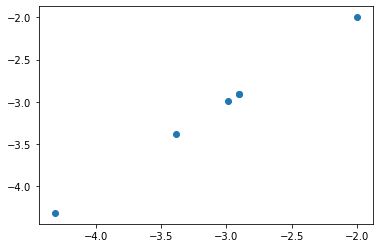

In [7]:
step=0
maxstep=1000
x1=-2
x2=-2
delta=f1(x1,x2)
Hesse=hesse(x1,x2)
trace=[[x1],[x2]]
res=[f(x1,x2)]
deltabound=0.0015
time_start=time.perf_counter()
while delta[0]*delta[0]+delta[1]*delta[1] >= deltabound:
    if step>maxstep:
        break
    step=step+1
    lamb=(delta[0]**2+delta[1]*delta[1])/(delta[0]**2*Hesse[0][0]+delta[1]**2*Hesse[1][1])
    x1=x1-delta[0]*lamb
    x2=x2-delta[1]*lamb
    trace[0].append(x1)
    trace[1].append(x2)
    res.append(f(x1,x2))
    delta=f1(x1,x2)
    Hesse=hesse(x1,x2)
time_end=time.perf_counter()
print('total cost:',(time_end-time_start)*1000)
plt.plot(res)
plt.figure()
plt.scatter(trace[0],trace[1])

2. 牛顿法

total cost: 0.41140000007544586


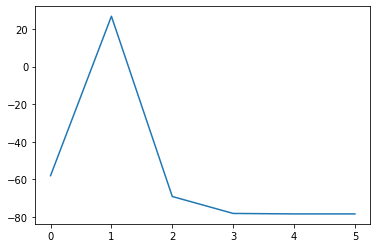

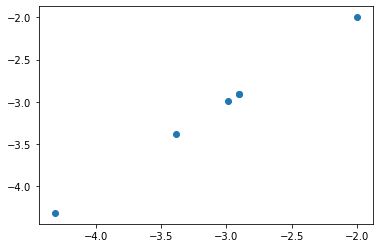

In [8]:
step=0
maxstep=1000
x1=-2
x2=-2
delta=f1(x1,x2)
Hesse=hesse(x1,x2)
trace=[[x1],[x2]]
res=[f(x1,x2)]
deltabound=0.0001
time_start=time.perf_counter()
while delta[0]*delta[0]+delta[1]*delta[1] >= deltabound:
    if step>maxstep:
        break
    step=step+1
    x1=x1-delta[0]*1/Hesse[0][0]
    x2=x2-delta[1]*1/Hesse[1][1]
    trace[0].append(x1)
    trace[1].append(x2)
    res.append(f(x1,x2))
    delta=f1(x1,x2)
    Hesse=hesse(x1,x2)
time_end=time.perf_counter()
print('total cost:',(time_end-time_start)*1000)
plt.plot(res)
plt.figure()
plt.scatter(trace[0],trace[1])

3. AgaGrad

total cost: 5.803500000013173


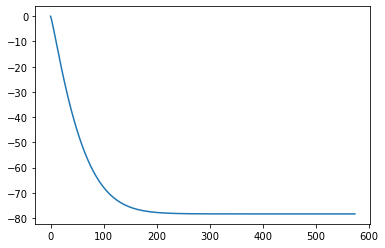

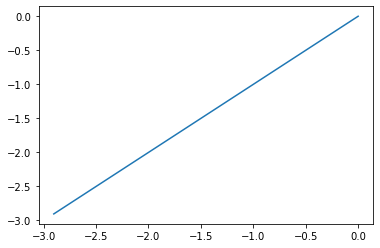

In [4]:
step=0
maxstep=1000
x1=0
x2=0
delta=f1(x1,x2)
trace=[[x1],[x2]]
res=[f(x1,x2)]
deltabound=0.0001
r=[0,0]
epsilon=0.1
eta=1.5*10**(-8)
time_start=time.perf_counter()
while delta[0]*delta[0]+delta[1]*delta[1] >= deltabound:
    if step>maxstep:
        break
    step=step+1
    r[0]=r[0]+delta[0]**2
    r[1]=r[1]+delta[1]**2
    x1=x1-delta[0]*epsilon/(eta+math.sqrt(r[0]))
    x2=x2-delta[1]*epsilon/(eta+math.sqrt(r[1]))
    trace[0].append(x1)
    trace[1].append(x2)
    res.append(f(x1,x2))
    delta=f1(x1,x2)
time_end=time.perf_counter()
print('total cost:',(time_end-time_start)*1000)
plt.plot(res)
plt.figure()
plt.plot(trace[0],trace[1])

4. Adam

total cost: 17.447200000020757


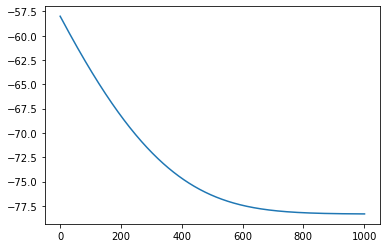

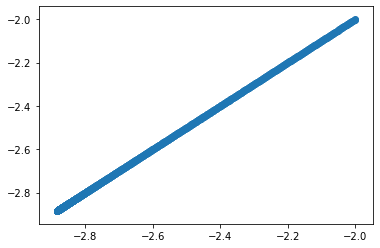

In [5]:
step=0
maxstep=1000
x1=-2
x2=-2
g=f1(x1,x2)
trace=[[x1],[x2]]
res=[f(x1,x2)]
deltabound=0.0001
rov1=0.9
rov2=0.999
rov1_t=1
rov2_t=1
r=0
s=[0,0]
epsilon=0.05
delta=1.5*10**(-8)
time_start=time.perf_counter();
while g[0]*g[0]+g[1]*g[1] >= deltabound:
    if step>maxstep:
        break
    step=step+1
    r=rov2*r+(1-rov2)*g[0]**2+g[1]**2
    s[0]=rov1*s[0]+(1-rov1)*g[0]
    s[1]=rov1*s[1]+(1-rov1)*g[1]
    rov1_t=rov1_t*rov1
    rov2_t=rov2_t*rov2
    rhat=r/(1-rov2_t)
    x1=x1-epsilon*s[0]/(1-rov1_t)*1/(delta+math.sqrt(rhat))
    x2=x2-epsilon*s[1]/(1-rov1_t)*1/(delta+math.sqrt(rhat))
    trace[0].append(x1)
    trace[1].append(x2)
    res.append(f(x1,x2))
    g=f1(x1,x2)
time_end=time.perf_counter()
print('total cost:',(time_end-time_start)*1000)
plt.plot(res)
plt.figure()
plt.scatter(trace[0],trace[1])

In [13]:
print(f(-2,-2))

-58.0
